In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
classes = {"front": 0,
           "back": 1,
           "left": 2,
           "right": 3,
           "f_left": 4, 
           "f_right": 5,
           "b_left": 6,
           "b_right": 7,
           "interior": 8,
           "trunk": 9,
           "panel": 10,
           "dirty": 11,
           "labeled": 12,
           "damaged": 13}

label_to_classes = {val:item for item, val in classes.items()}
labels = [label_to_classes[k] for k in sorted(label_to_classes.keys())]

In [4]:
df = pd.read_csv('nvbs_auto.csv')
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
df.head()

,image,id,choice,class_0,class_1,class_2,class_3,class_4,class_5,class_6,...,height,width,r_mean,g_mean,b_mean,r_std,g_std,b_std,md5,label
0,0.jpg,0,panel,0,0,0,0,0,0,0,...,957,1280,0.664191,0.662805,0.649829,0.248083,0.248339,0.259096,5d4b35aaa33358623fe66153744bd01a,"[{""x"": 42.13333333333333, ""y"": 32.798573975044..."
1,1.jpg,1,right,0,0,0,1,0,0,0,...,957,1280,0.596717,0.605751,0.580831,0.255681,0.252227,0.258267,9f98baecf558334f86e320d092a41ffa,NaN
2,2.jpg,2,interior,0,0,0,0,0,0,0,...,957,1280,0.600527,0.595664,0.581935,0.316734,0.323528,0.332438,947d2f3d3b7089285caacda49cad7438,"[{""x"": 40.666666666666664, ""y"": 49.19786096256..."
3,3.jpg,3,panel,0,0,0,0,0,0,0,...,960,1280,0.464392,0.478320,0.487675,0.189722,0.183444,0.178202,f967b7f08a2946d59c3e18cd4f9e1e32,"[{""x"": 48, ""y"": 34.4582593250444, ""width"": 16...."
4,4.jpg,4,interior,0,0,0,0,0,0,0,...,960,1280,0.450628,0.462521,0.465585,0.209926,0.222312,0.228740,9cc3f11f235406683586dae8ed07af9b,NaN


In [5]:
def plot_bars(df, labels):
    distribution = df.iloc[:, 3:17].sum()
    distribution.index = labels
    distribution['TOTAL'] = len(df)
    distribution.plot(kind='bar')

def show_carbody_classes(df, labels):
    """Распределение классов на фотографиях кузова."""
    df = df[df.iloc[:, 3:11].any(axis=1)]
    plot_bars(df, labels)
    
def show_interior_classes(df, labels):
    """Распределение классов на фотографиях салона."""
    df = df[df.iloc[:, 11] == 1]
    plot_bars(df, labels)
    
def show_trunk_classes(df, labels):
    """Распределение классов на фотографиях багажника."""
    df = df[df.iloc[:, 12] == 1]
    plot_bars(df, labels)   

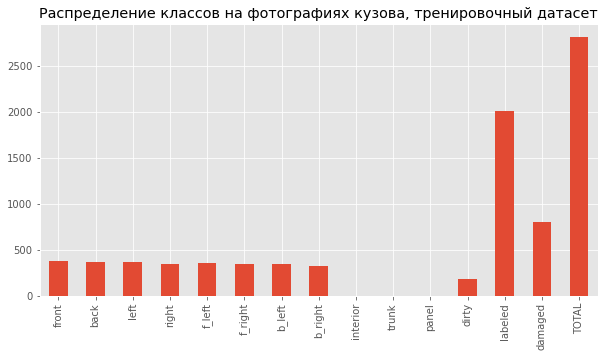

In [6]:
plt.title('Распределение классов на фотографиях кузова, тренировочный датасет')
show_carbody_classes(df, labels)

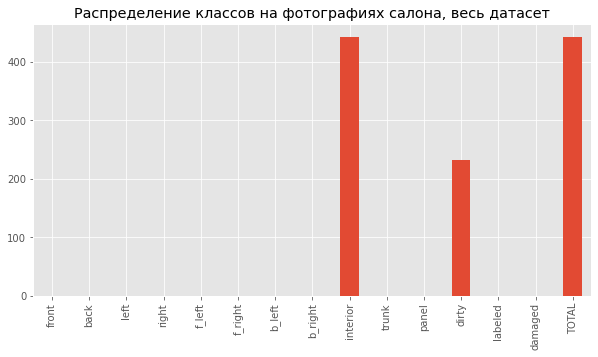

In [7]:
plt.title('Распределение классов на фотографиях салона, весь датасет')
show_interior_classes(df, labels)

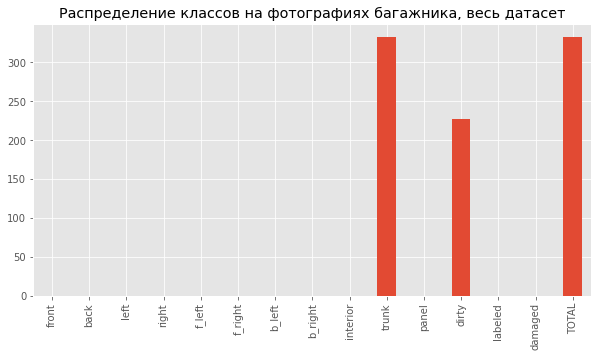

In [8]:
plt.title('Распределение классов на фотографиях багажника, весь датасет')
show_trunk_classes(df, labels)

In [9]:
val = len(df[~df.iloc[:, 3:17].any(axis=1)]) / len(df)
print(f'Левых фотографий без классов: {val:.3%}')

Левых фотографий без классов: 7.458%


In [10]:
def show_cities(df):
    """Распределение городов."""
    pivot = df.pivot_table(
        index='city',
        values='image',
        aggfunc='count'
    )['image']
    pivot = pivot.sort_values()
    pivot.plot(kind='bar')   

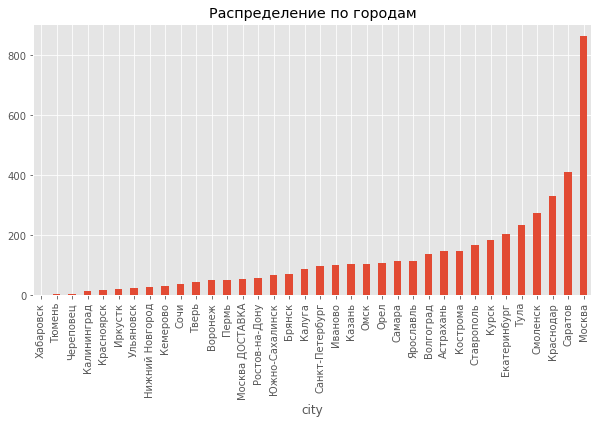

In [11]:
plt.title('Распределение по городам')
show_cities(df)

Для валидации выберем города с 700-800 изображений и проверим их распределение классов.

In [12]:
def train_valid_split(df, cities):
    train = df[~df['city'].isin(cities)]
    valid = df[df['city'].isin(cities)]
    return train, valid

In [13]:
train_df, valid_df = train_valid_split(df, cities=['Екатеринбург', 'Курск', 'Самара', 'Орел', 'Омск'])
train_df.shape, valid_df.shape

((3790, 28), (715, 28))

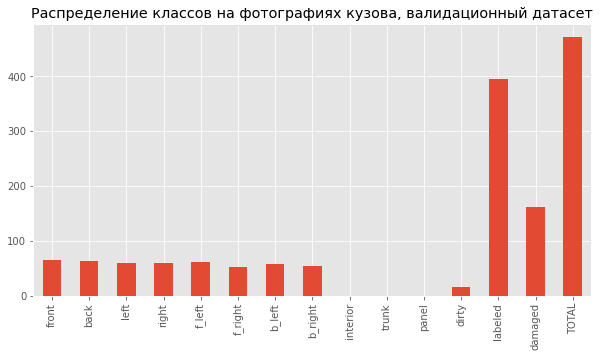

In [14]:
plt.title('Распределение классов на фотографиях кузова, валидационный датасет')
show_carbody_classes(valid_df, labels)

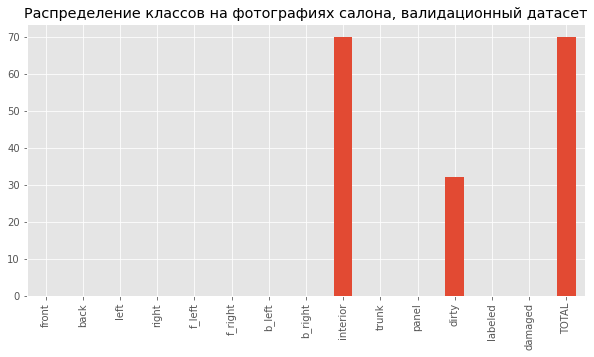

In [15]:
plt.title('Распределение классов на фотографиях салона, валидационный датасет')
show_interior_classes(valid_df, labels)

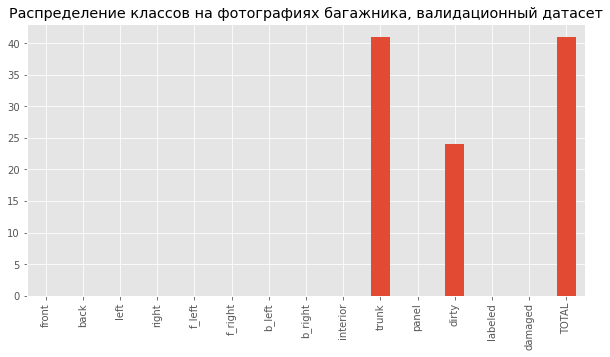

In [16]:
plt.title('Распределение классов на фотографиях багажника, валидационный датасет')
show_trunk_classes(valid_df, labels)

In [17]:
valid_df['label'].isna().sum()

422

In [18]:
train_df['label'].isna().sum()

2302

In [19]:
train_df.to_csv('train.csv', index=False)
valid_df.to_csv('valid.csv', index=False)

### Размеры фотографий

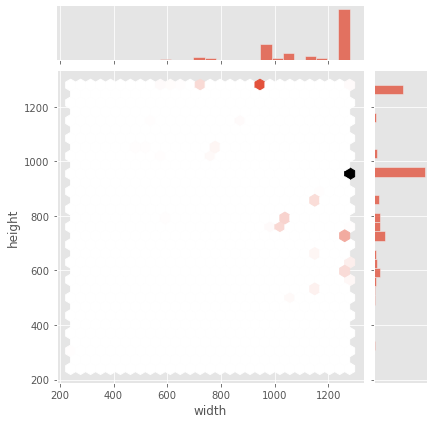

In [20]:
plot_df = train_df[(train_df['width'] < 1500) & (train_df['height'] < 1500)]
sns.jointplot(x=plot_df['width'], y=plot_df['height'], kind="hex")

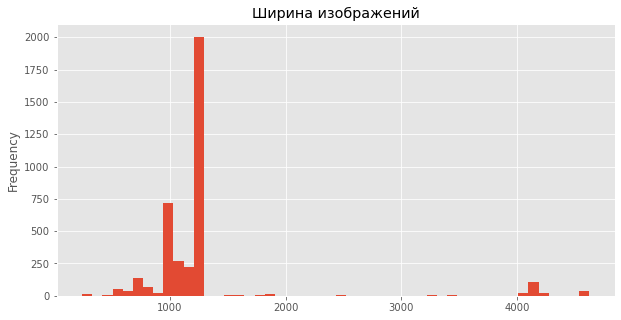

In [21]:
plt.title('Ширина изображений')
train_df['width'].plot(kind='hist', bins=50);

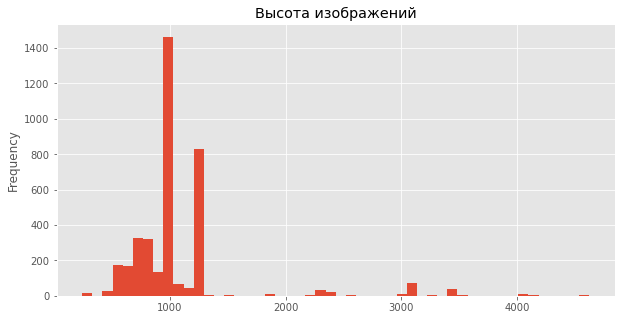

In [22]:
plt.title('Высота изображений')
train_df['height'].plot(kind='hist', bins=50);

### Баланс цветов

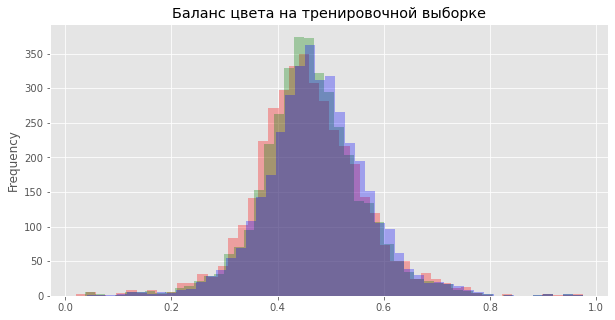

In [23]:
train_df['r_mean'].plot(kind='hist', bins=50, color='red', alpha=0.3)
train_df['g_mean'].plot(kind='hist', bins=50, color='green', alpha=0.3)
train_df['b_mean'].plot(kind='hist', bins=50, color='blue', alpha=0.3)
plt.title('Баланс цвета на тренировочной выборке');

In [24]:
for param in 'rgb':
    name_mean = f'{param}_mean'
    name_std = f'{param}_std'
    
    mean = train_df[name_mean].mean()
    std = train_df[name_std].mean()
    
    print(f'{name_mean}: {mean:.4f} | {name_std}: {std:.4f}')

r_mean: 0.4595 | r_std: 0.2418
g_mean: 0.4634 | g_std: 0.2418
b_mean: 0.4740 | b_std: 0.2428
